In [157]:
!pip install scikit-learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
output_path = './期末參數資料(綜合_去極端_流量).csv'
df = pd.read_csv(output_path)

data = df[['形式','入水口角度','出水口角度','旋轉角度','葉厚','片數','間隙(葉輪與幫浦腳)','Q(全開流量)']].values
value = df[['揚程','W(瓦數)']].values  

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
value_mean = np.mean(value, axis=0)
value_std = np.std(value, axis=0)

data = (data - data_mean) / data_std
value = (value - value_mean) / value_std

data_train, data_test, value_train, value_test = train_test_split(data, value, test_size=0.2, random_state=42)

In [3]:
df.head()

,形式,入水口角度,出水口角度,旋轉角度,葉厚,片數,間隙(葉輪與幫浦腳),Q(全開流量),揚程,W(瓦數)
0,1,34.0,13.0,64,2.5,6,0.3,25.0,9.6,164.0
1,1,34.0,13.0,64,2.5,6,0.3,50.0,8.1,199.0
2,1,34.0,13.0,64,2.5,6,0.3,75.0,5.2,235.0
3,1,34.0,13.0,64,2.5,6,0.3,100.0,1.0,273.0
4,1,34.0,13.0,63,2.5,6,0.3,25.0,9.3,165.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(2, input_shape=(8,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, )
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.0074), loss='mse', metrics='accuracy')

In [ ]:
history = model.fit(data_train, value_train, validation_split = 0.2, epochs=200, batch_size=2)

Epoch 1/200
155/155 [==============================] - 1s 4ms/step - loss: 1.0013 - accuracy: 0.4613 - val_loss: 0.8018 - val_accuracy: 0.5769
Epoch 2/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.4710 - val_loss: 0.8040 - val_accuracy: 0.5769
Epoch 3/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.5484 - val_loss: 0.8023 - val_accuracy: 0.5769
Epoch 4/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0039 - accuracy: 0.5484 - val_loss: 0.8022 - val_accuracy: 0.4231
Epoch 5/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0027 - accuracy: 0.5161 - val_loss: 0.8018 - val_accuracy: 0.4231
Epoch 6/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0006 - accuracy: 0.4516 - val_loss: 0.8020 - val_accuracy: 0.5769
Epoch 7/200
155/155 [==============================] - 0s 2ms/step - loss: 1.0014 - accuracy: 0.4968 - val_loss: 0.8027 - val_accuracy: 0.4231

In [6]:
# evaluate model
model.evaluate(data_test, value_test)

# drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [12]:
from sklearn.metrics.pairwise import cosine_similarity    
           
def r_of_R():
    Pearson = cosine_similarity([model.predict(data_train)[:,0], value_train[:,0]])
    print(Pearson[0,1])

def r_of_W():
    Pearson = cosine_similarity([model.predict(data_train)[:,1], value_train[:,1]])
    print(Pearson[0,1])

r_of_R()
r_of_W()


13/13 [==============================] - 0s 2ms/step
0.9746532130712144
13/13 [==============================] - 0s 1ms/step
0.9682506156817823


In [190]:
data_train[0:5]

array([[-0.78055847, -0.46081772, -0.81880222,  1.02735407,  0.69223818,
         0.51255006, -1.60829407, -0.86354695],
       [-0.78055847,  0.07343183, -0.22397729,  0.77202598, -1.02422996,
         0.51255006, -1.60829407, -1.65729464],
       [-0.78055847, -0.46081772, -0.81880222,  0.83585801,  0.69223818,
         0.51255006, -1.60829407, -0.07296159],
       [ 1.28113401,  0.07343183,  0.96567258, -0.24928638,  0.69223818,
        -1.76579745,  0.57869787,  0.17686338],
       [-0.78055847,  3.27892913, -2.00845209,  1.02735407,  0.69223818,
         0.51255006, -1.60829407,  0.71446142]])

In [192]:
np.set_printoptions(suppress=True)
value_train 

array([[ 0.13032915, -0.3990684 ],
       [ 0.49766946, -0.9659967 ],
       [-0.52563569,  0.05019554],
       [-0.39444273, -1.08366106],
       [-1.54894085,  0.37109835],
       [ 0.18280633, -0.37767488],
       [ 0.55014664, -0.95529994],
       [ 1.02244133,  1.20116696],
       [ 1.75712195,  2.81851713],
       [ 2.15070086,  2.19596567],
       [-0.57811288, -0.01398502],
       [-1.7588496 ,  0.24273723],
       [-0.18453398, -0.54882304],
       [ 0.13032915, -0.57021656],
       [-0.76178304, -0.21722347],
       [-0.39444273, -1.08366106],
       [ 0.49766946, -0.9659967 ],
       [ 1.23235008,  0.86100998],
       [ 0.55014664, -0.94460318],
       [ 0.52390805, -1.25480923],
       [ 0.10409055, -0.5595198 ],
       [-1.47022507,  0.43527891],
       [ 0.02537477, -0.83763557],
       [ 1.1536343 ,  0.5743368 ],
       [ 1.38978164,  0.92732989],
       [ 0.57638524, -0.92320966],
       [-0.81426022, -0.16373967],
       [ 1.25858867,  1.94352213],
       [ 0.91748696,

In [193]:
model.predict(data_train) #[predict_distance,predict_height]

13/13 [==============================] - 0s 2ms/step


array([[ 0.18898022, -0.48110673],
       [ 0.49497506, -0.99227834],
       [-0.67580485, -0.17496738],
       [-0.26571333, -0.97971845],
       [-1.7825159 ,  0.24835368],
       [ 0.14543253, -0.52886057],
       [ 0.4876842 , -1.0209175 ],
       [ 1.3211757 ,  1.5614381 ],
       [ 1.677722  ,  2.519876  ],
       [ 1.5494618 ,  2.175098  ],
       [-0.67580485, -0.17496738],
       [-1.7825159 ,  0.24835368],
       [-0.24306262, -0.7313454 ],
       [ 0.08878762, -0.59097683],
       [-0.67580485, -0.17496738],
       [-0.26571333, -0.97971845],
       [ 0.48984528, -1.0124286 ],
       [ 1.0679803 ,  0.88099205],
       [ 0.4905818 , -1.0095354 ],
       [ 0.4980333 , -0.9802654 ],
       [ 0.13244534, -0.54310215],
       [-1.7825159 ,  0.24835368],
       [-0.26420665, -0.9780663 ],
       [ 0.928437  ,  0.51826394],
       [ 0.9005754 ,  0.4458406 ],
       [ 0.48437828, -1.0339034 ],
       [-0.67580485, -0.17496738],
       [ 1.3180945 ,  1.5531554 ],
       [ 1.0137374 ,

In [194]:
#showing the predicting consequence

type_input = float(input("type('1' for centrifugal, '2' for hybrid)："))
inlet_angle_input = float(input("inlet_angle（degree）："))
outlet_angle_input = float(input("outlet_angle（degree）："))
rotating_angle_input = float(input("rotating_angle（degree）："))
thickness_input = float(input("thickness (mm)："))
slices_input = float(input("slices："))
gap_input = float(input("gap (mm)："))
flow_input = float(input("flow (L/min)："))

type_input = (type_input - data_mean[0])/data_std[0]
inlet_angle_input = (inlet_angle_input - data_mean[1])/data_std[1]
outlet_angle_input = (outlet_angle_input - data_mean[2])/data_std[2]
rotating_angle_input =(rotating_angle_input - data_mean[3])/data_std[3]
thickness_input = (thickness_input - data_mean[4])/data_std[4]
slices_input = (slices_input - data_mean[5])/data_std[5]
gap_input = (gap_input - data_mean[6])/data_std[6]
flow_input = (flow_input - data_mean[7])/data_std[7]

predicted_values = model.predict(np.array([[type_input,inlet_angle_input,outlet_angle_input,rotating_angle_input,thickness_input,slices_input,gap_input,flow_input]]))[0]
predict_range = predicted_values[0] 
predict_power = predicted_values[1] 

predict_range = predict_range * value_std[0] + value_mean[0]
predict_power = predict_power * value_std[1] + value_mean[1]


print('(1)predict_range(m): ', predict_range)
print('(2)predict_power(w): ', predict_power)

type('1' for centrifugal, '2' for hybrid)： 1
inlet_angle（degree）： 34
outlet_angle（degree）： 13
rotating_angle（degree）： 64
thickness (mm)： 2.5
slices： 6
gap (mm)： 0.3
flow (L/min)： 50


1/1 [==============================] - 0s 21ms/step
(1)predict_range(m):  7.94852152418808
(2)predict_power(w):  199.2432950115677


In [198]:
model.save('ANN_DCBL.h5')

1/1 [==============================] - 0s 21ms/step


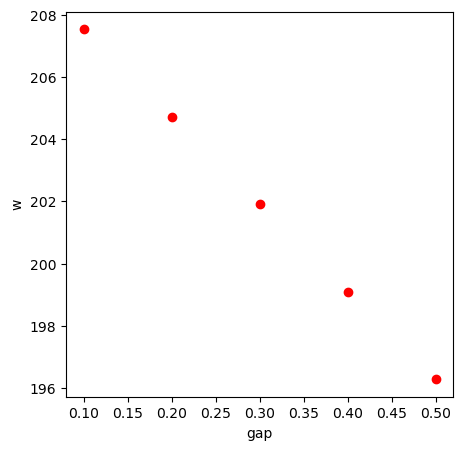

In [268]:
d = []
#[1,34,14,64,3,6,0.3,50]
for i in range(5): #改 1
    d.append([1,34,14,64,3,6,50]) #改 1
    
d_f = pd.DataFrame(d, columns=['type','inlet_angle','outlet_angle','rotating_angle','thickness','slices','flow'])#改 1
d_f['gap'] = np.arange(0.1, 0.6, 0.1) #改 2
d_f = d_f[['type','inlet_angle','outlet_angle','rotating_angle','thickness','slices','gap','flow']].values  
d_f_scaled = (d_f - data_mean) / data_std

def plot_w_to_factor (data_set, y):
    y = y * value_std + value_mean
    plt.figure(figsize=(5, 5));
    plt.scatter(data_set[:,6], y[:,1], marker="o", color="red") #改 1
    plt.xlabel("gap") #改 1
    plt.ylabel("w")
    plt.show()


plot_w_to_factor(d_f,model.predict(d_f_scaled))